# Project Proposal 1 - Melbourne Property Market Analysis

The Objective of this study is to look into and gain insights into the Melbourne Real Estate  market by examining different viewpoints and elements that influence property values. The research utilises a dataset sourced from Kaggle, Geoapify  compromising information on property transactions within the Melbourne City Region.

Bich's Analysis: Age as a Variable: Examining the Influence of Building Age on Victorian Property Values and Its Consistency Across All Suburbs

Null hypothesis: There is no correlation between housing pricing and age of building. 
Alternate Hypothesis: There is significant correlation between housing pricing and age of building. 

Based on the data there were 330 unique suburbs in the dataset with a radius ranging out to a maximum of 48.1km from Melbourne CBD. Given the age of Melbourne and rapid development of high density residential housing around the CDB, the project team felt it important to focus on analysing this area and excluding regional Victoria within in the analysis. 

In the initial analysis of median housing price sales compared to the year of being built, the linear regression trend was negative, the r-squared value is 0.093 which is indicating there is a low level of dependence correlation between the two variables. 

Further analysis was undertaken to determine the variability as a function of distance to Melbourne CBD, a key contributing factor was the gold rush in the 1850s (source: https://en.wikipedia.org/wiki/History_of_Melbourne) suggesting the prime real estate, closest in distance to the CBD would be higher in value. Although this theory would also serve as a compelling, analysing bar graph and scatter plot, this would suggest such a relation, however the r-squared value is once again low at 0.022.

A third analysis was conducted by binning the distances of residential homes by distances to CBD, this showed interesting trends. Towards 30-50kms distance from the CBD, the box plots were rather tight, the inter quartile ranges were small and with no outliers. However, the greatest outliers were shown in distances from the CBD; 0-10km, 10-20km and thirdly by 20-30kms. These three range buckets also showed positively skewed results with a longer upper whisker. The team wanted to analyse the pre and post covid impacts as it is well known the house pricing in Melbourne CBD dropped significantly during the pandemic (source: https://fbe.unimelb.edu.au/newsroom/the-impact-of-covid-19-on-australias-housing-market),  however the data was truncated at 2017. This opens the opportunity for future analysis. 


In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Read house data file
age = "../Resources/Property Sales of Melbourne City.csv"
age_df = pd.read_csv(age)

# Display the data table for preview
age_df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [32]:
age_df.dtypes

Unnamed: 0         int64
Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [33]:
# Count how many unique suburbs in Vic
unique_count = age_df['Suburb'].nunique()
unique_count

330

In [34]:
# Calulate the greatest distance from CBD
max_dist = age_df['Distance'].max()
max_dist

48.1

In [35]:
# Data clean to remove Nan in Year Built
agedrop_df = age_df.dropna(how='any')
agedrop_df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,11,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,14,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15388,19732,Whittlesea,30 Sherwin St,3,h,601000,S,Ray,29/07/2017,35.5,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
15389,19733,Williamstown,75 Cecil St,3,h,1050000,VB,Williams,29/07/2017,6.8,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
15390,19734,Williamstown,2/29 Dover Rd,1,u,385000,SP,Williams,29/07/2017,6.8,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
15392,19736,Windsor,201/152 Peel St,2,u,560000,PI,hockingstuart,29/07/2017,4.6,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [36]:
#check no blank values in data is complete
agedrop_df.count()

Unnamed: 0       6196
Suburb           6196
Address          6196
Rooms            6196
Type             6196
Price            6196
Method           6196
SellerG          6196
Date             6196
Distance         6196
Postcode         6196
Bedroom2         6196
Bathroom         6196
Car              6196
Landsize         6196
BuildingArea     6196
YearBuilt        6196
CouncilArea      6196
Lattitude        6196
Longtitude       6196
Regionname       6196
Propertycount    6196
dtype: int64

In [37]:
#Year built convert float to int
agedrop_df = agedrop_df.astype({"YearBuilt": int}, errors='raise')

In [38]:
agedrop_df['YearBuilt'].dtypes

dtype('int64')

In [39]:
# Rename columns 
agedrop_df.describe

<bound method NDFrame.describe of        Unnamed: 0        Suburb          Address  Rooms Type    Price Method  \
1               2    Abbotsford  25 Bloomburg St      2    h  1035000      S   
2               4    Abbotsford     5 Charles St      3    h  1465000     SP   
4               6    Abbotsford      55a Park St      4    h  1600000     VB   
6              11    Abbotsford     124 Yarra St      3    h  1876000      S   
7              14    Abbotsford    98 Charles St      2    h  1636000      S   
...           ...           ...              ...    ...  ...      ...    ...   
15388       19732    Whittlesea    30 Sherwin St      3    h   601000      S   
15389       19733  Williamstown      75 Cecil St      3    h  1050000     VB   
15390       19734  Williamstown    2/29 Dover Rd      1    u   385000     SP   
15392       19736       Windsor  201/152 Peel St      2    u   560000     PI   
15395       19739    Yarraville  54 Pentland Pde      6    h  2450000     VB   

     

y = -5397.48x + 11669921.62
The r-squared is: 0.0928009809673293


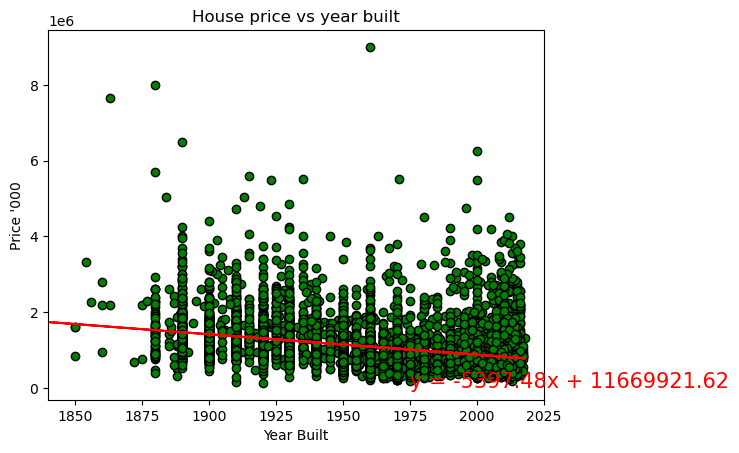

In [40]:
# x-y scatter, calculating the line equation amd r-squared value - year built by price
x_values = year = agedrop_df['YearBuilt']
y_values = price = agedrop_df['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(agedrop_df['YearBuilt'],agedrop_df['Price'], marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1975,8000),fontsize=15,color="red")
plt.xlabel("Year Built")
plt.ylabel("Price '000")
plt.title("House price vs year built")
plt.xlim(1840,2025)

print(f"The r-squared is: {rvalue**2}")
plt.savefig('../BJ_Analysis/pricevyear.jpg')
plt.show()

In [41]:
print(f"The correlation coefficient between alcohol and color intensity is {round(st.pearsonr(year,price)[0],2)}")

The correlation coefficient between alcohol and color intensity is -0.3


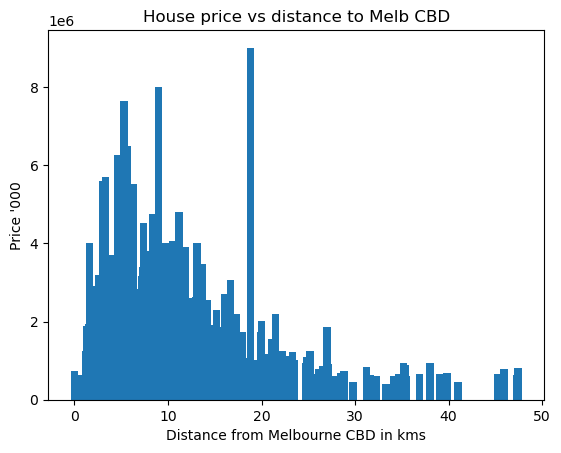

In [42]:
# knowing CBD builds out,typically age is older by CBD, hence order dataset by distance from CBD and see the correlation
#agedrop_df = pd.DataFrame('Distance')

# Sort the DataFrame by the 'Values' column in descending order
agedrop_df_dist = agedrop_df.sort_values(by='Distance', ascending=False)
agedrop_df_dist
# Plot the data
plt.bar(agedrop_df_dist['Distance'], agedrop_df_dist['Price'])
plt.xlabel("Distance from Melbourne CBD in kms")
plt.ylabel("Price '000")
plt.title("House price vs distance to Melb CBD")

# Show the plot
plt.savefig('../BJ_Analysis/pricevdist_bar.jpg')
plt.show()

y = -17909.34x + 1243463.96
The r-squared is: 0.022161337930082375


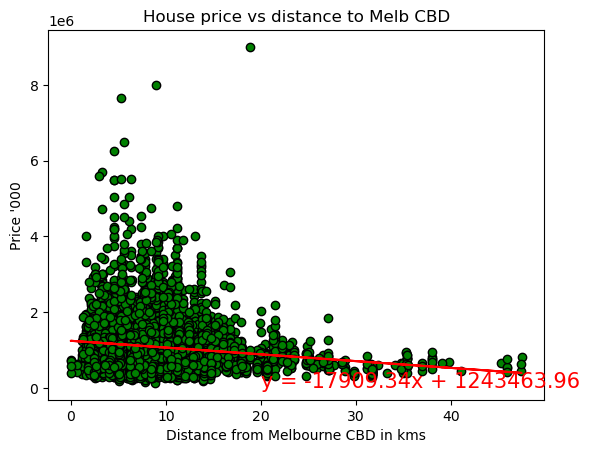

In [43]:
# x-y scatter, calculating the line equation amd r-squared value - year built by distnace to CDB
x_values = year = agedrop_df['Distance']
y_values = price = agedrop_df['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(agedrop_df['Distance'],agedrop_df['Price'], marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,4),fontsize=15,color="red")
plt.xlabel("Distance from Melbourne CBD in kms")
plt.ylabel("Price '000")
plt.title("House price vs distance to Melb CBD")

print(f"The r-squared is: {rvalue**2}")
plt.savefig('../BJ_Analysis/pricevdist_scatter.jpg')
plt.show()

In [44]:
# Group year built in buckets and draw box plots
agedrop_df_group = agedrop_df.groupby(["Distance"])
print(agedrop_df_group)
agedrop_df_group.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,11,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,...,2.0,0.0,245.0,210.0,1910,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,14,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,...,1.0,2.0,256.0,107.0,1890,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245,19553,Melbourne,709/87 Franklin St,2,u,565000,S,MICM,29/07/2017,0.0,...,1.0,0.0,89.0,85.0,2003,Melbourne,-37.80802,144.96168,Northern Metropolitan,17496.0
15263,19573,Mooroolbark,149 Manchester Rd,3,h,696000,S,Fletchers,29/07/2017,26.5,...,1.0,2.0,886.0,120.0,1960,Yarra Ranges,-37.77530,145.31266,Eastern Victoria,8280.0
15385,19727,Westmeadows,43 Bamford Av,4,h,821000,S,YPA,29/07/2017,16.5,...,3.0,2.0,544.0,264.0,1997,Hume,-37.67841,144.87924,Northern Metropolitan,2474.0
15386,19729,Westmeadows,4 Pershore Ct,3,h,635000,S,Barry,29/07/2017,16.5,...,2.0,1.0,691.0,177.0,1975,Hume,-37.68026,144.88468,Northern Metropolitan,2474.0


In [45]:
bin_df = agedrop_df['Distance']

# Define bin edges
bin_edges = [0, 10, 20, 30, 40, 50]

# Create bin labels
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50']

# Create a new column with bin labels
agedrop_df["bin"] = pd.cut(agedrop_df['Distance'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame
agedrop_df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,bin
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,0.0,156.0,79.00,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,0-10
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,0.0,134.0,150.00,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,0-10
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,2.0,120.0,142.00,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,0-10
6,11,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,...,0.0,245.0,210.00,1910,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0,0-10
7,14,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,...,2.0,256.0,107.00,1890,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15388,19732,Whittlesea,30 Sherwin St,3,h,601000,S,Ray,29/07/2017,35.5,...,1.0,972.0,149.00,1996,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0,31-40
15389,19733,Williamstown,75 Cecil St,3,h,1050000,VB,Williams,29/07/2017,6.8,...,0.0,179.0,115.00,1890,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0,0-10
15390,19734,Williamstown,2/29 Dover Rd,1,u,385000,SP,Williams,29/07/2017,6.8,...,1.0,0.0,35.64,1967,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0,0-10
15392,19736,Windsor,201/152 Peel St,2,u,560000,PI,hockingstuart,29/07/2017,4.6,...,1.0,0.0,61.60,2012,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0,0-10


In [46]:
# agedrop_df_grouped = agedrop_df.groupby('bin')
# print(agedrop_df_grouped)
# Create empty list to fill with tumor vol data (for plotting)

pricing_distance = []

for distance in bin_labels :
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    data = agedrop_df[agedrop_df["bin"] == distance]
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # add subset 
    pricing_distance.append(data["Price"])
        
    # Determine outliers using upper and lower bounds
    quartiles = data["Price"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = data.loc[(data["Price"] < lower_bound) | (data["Price"]  > upper_bound)][["Price","bin"]]
    if not outliers.empty:
        print(distance,"Outliers:" )
        print(outliers.to_string(index=False))
        
    print("")


0-10 Outliers:
  Price  bin
2850000 0-10
2615000 0-10
3010000 0-10
2800000 0-10
4735000 0-10
2840000 0-10
2801000 0-10
5525000 0-10
3625000 0-10
4200000 0-10
3512500 0-10
4000000 0-10
2800000 0-10
3270000 0-10
2730000 0-10
3290000 0-10
3401000 0-10
3020000 0-10
3230000 0-10
3300000 0-10
2614000 0-10
3250000 0-10
3690000 0-10
2910000 0-10
3360000 0-10
4000000 0-10
2650000 0-10
2608000 0-10
2700000 0-10
3400000 0-10
3300000 0-10
3225000 0-10
3320000 0-10
2750000 0-10
2740000 0-10
2950000 0-10
2900000 0-10
2620000 0-10
2930000 0-10
2950000 0-10
3550000 0-10
3400000 0-10
3145000 0-10
2950000 0-10
2718000 0-10
3010000 0-10
2806000 0-10
3572000 0-10
2800000 0-10
2620000 0-10
3310000 0-10
4011000 0-10
3400000 0-10
3400000 0-10
3730000 0-10
2850000 0-10
2975000 0-10
2825000 0-10
2825000 0-10
3085000 0-10
3860000 0-10
2625000 0-10
2725000 0-10
2800000 0-10
2950000 0-10
3365000 0-10
2670000 0-10
3225000 0-10
3950000 0-10
4250000 0-10
5050000 0-10
3750000 0-10
3550000 0-10
4850000 0-10
6500000 0-

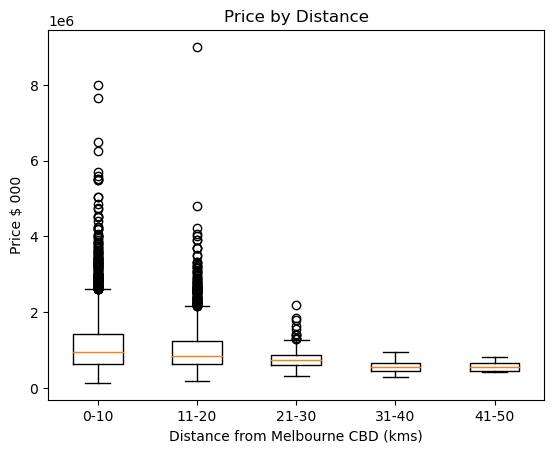

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Price by Distance")
ax1.set_ylabel("Price $ 000")
ax1.set_xlabel("Distance from Melbourne CBD (kms)")
    
ax1.boxplot(pricing_distance, labels=bin_labels,  showfliers=True)
plt.savefig('../BJ_Analysis/pricevdist_bins_box.jpg')
plt.show()

In [60]:
price_mean = agedrop_df['Price'].mean()
price_mean

1068828.202065849

In [61]:
# Define the null hypothesis mean
null_hypothesis_mean = price_mean

# Perform the one-sample t-test
t_statistic, p_value = st.ttest_1samp(agedrop_df['Price'], null_hypothesis_mean)

T-statistic: 0.0
P-value: 1.0


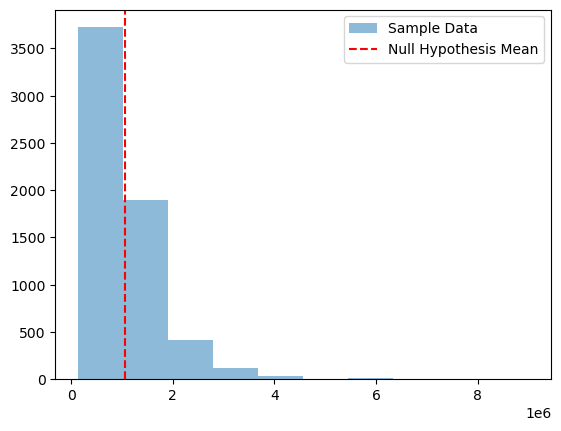

In [64]:
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# You can also create a histogram to visualize the data
plt.hist(agedrop_df['Price'], bins=10, alpha=0.5, label='Sample Data')
plt.axvline(x=null_hypothesis_mean, color='red', linestyle='--', label='Null Hypothesis Mean')
plt.legend()
plt.show()